In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from IPython.display import Image

from geneticalgorithm import geneticalgorithm as ga
%matplotlib notebook

## Тестовые функции для одной цели оптимизации

### Функция Экли

In [2]:
def ackley_function(X):
    res = (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (X[0] ** 2 + X[1] ** 2)))
        - np.exp(0.5 * ( np.cos (2 * np.pi * X[0])
        + np.cos ( 2 * np.pi * X[1]))) +  np.e + 20
    )
    return res

### Функция Била

In [3]:
def beale_function(X):
    res = (
        (1.5 - X[0] + X[0] * X[1]) ** 2
        + (2.25 - X[0] + X[0] * X[1] ** 2) ** 2
        + (2.625 - X[0] + X[0] * X[1] ** 3) ** 2
    )
    return  res

### Функция Изома

In [4]:
def easom_function(X):
    return (
        - np.cos(X[0]) * np.cos(X[1]) * np.exp(
            -((X[0] - np.pi) ** 2 + (X[1] - np.pi) ** 2)
        )
    )

# Генетический алгоритм
### Для функции Экли

 The best solution found:                                                                           
 [-3.91361504e-05  1.69572425e-06]

 Objective function:
 0.00011083846992576696


<IPython.core.display.Javascript object>


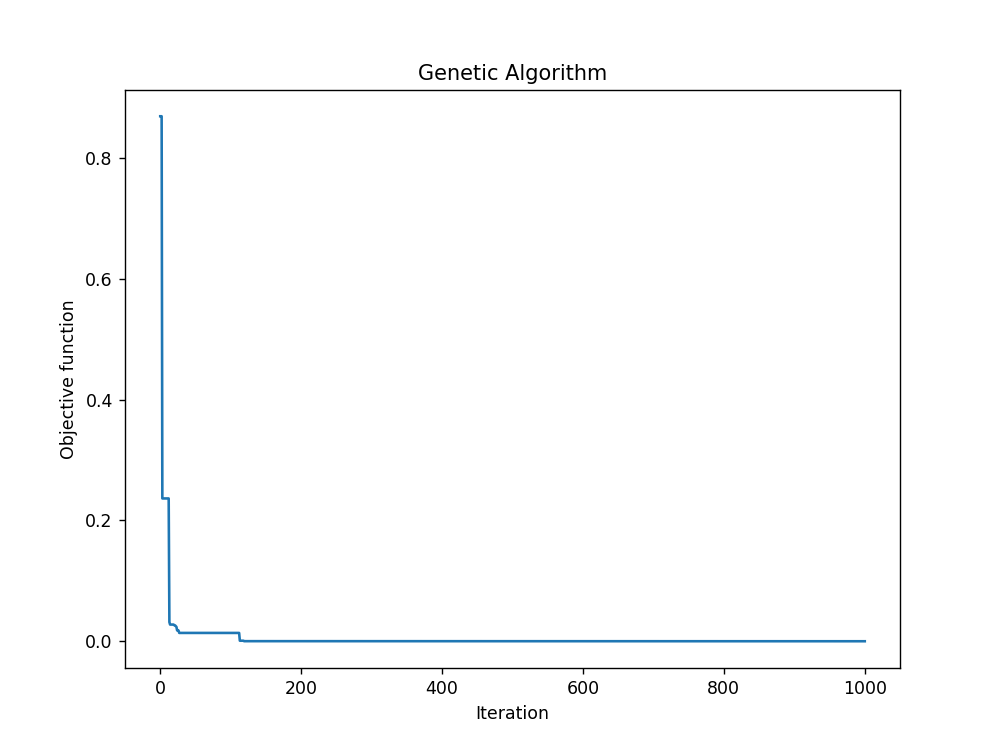

Время выполнения  11.663127660751343


In [5]:
t = time.time()
varbound = np.array([[-5,5]]*2)
model=ga(function=ackley_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

### Для функции Била

 The best solution found:                                                                           
 [2.98949936 0.49740363]

 Objective function:
 1.786427409039467e-05


<IPython.core.display.Javascript object>


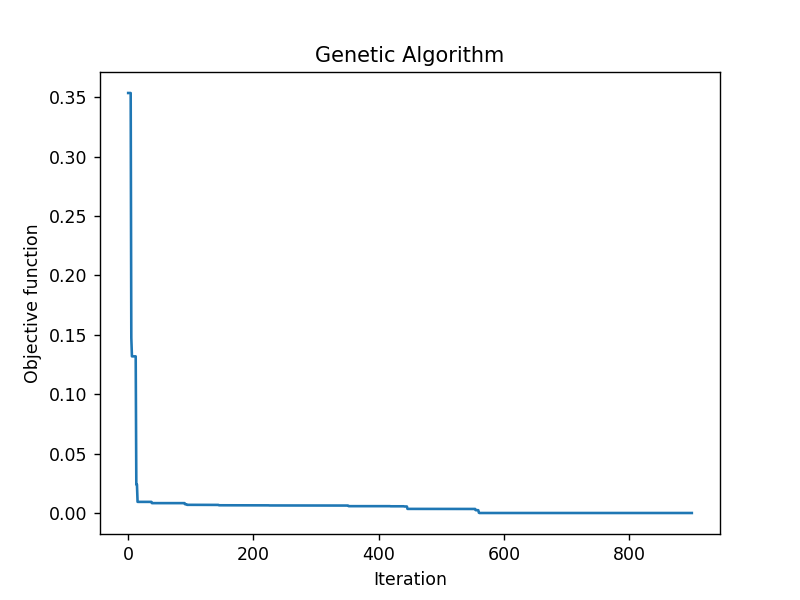

Время выполнения  9.945656776428223


In [6]:
t = time.time()
varbound = np.array([[-4.5,4.5]]*2)
model=ga(function=beale_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

### Для функции Изома

 The best solution found:                                                                           
 [3.14157483 3.14158108]

 Objective function:
 -0.9999999993225086


<IPython.core.display.Javascript object>


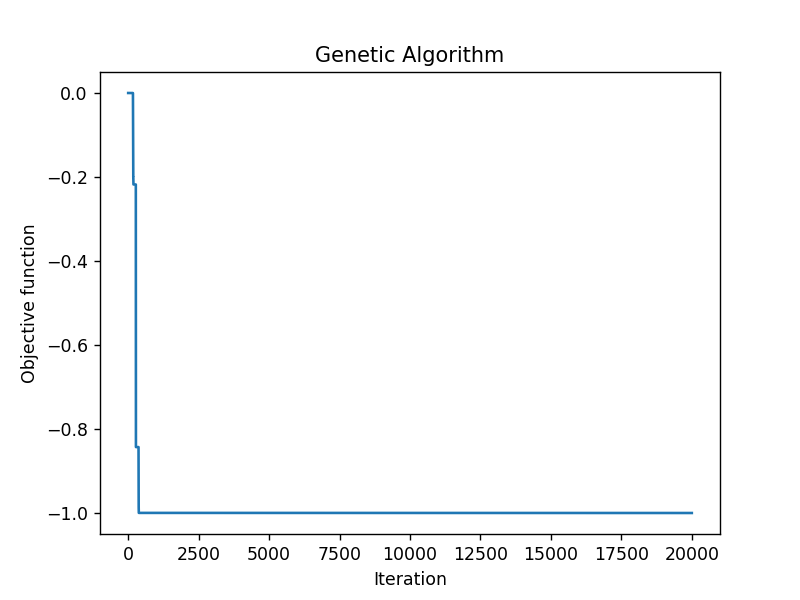

Время выполнения  225.68054485321045


In [7]:
t = time.time()
varbound = np.array([[-100,100]]*2)
model=ga(function=easom_function,dimension=2,variable_type='real', variable_boundaries=varbound)
model.run()
t=time.time()-t
print('Время выполнения ', t)

# Алгоритм роя частиц

In [8]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher, Designer

### Для функции Экли

In [9]:
def ackley_function2(x):
    j = (
        -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2).sum(axis=1)))
        - np.exp(0.5 * np.cos(2 * np.pi * x).sum(axis=1))
        + 20.0 + np.e
    )
    return j

2021-11-15 01:50:59,071 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=7.75e-13
2021-11-15 01:50:59,413 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.749356711883593e-13, best pos: [-7.87088367e-14  2.62342527e-13]


<IPython.core.display.Javascript object>


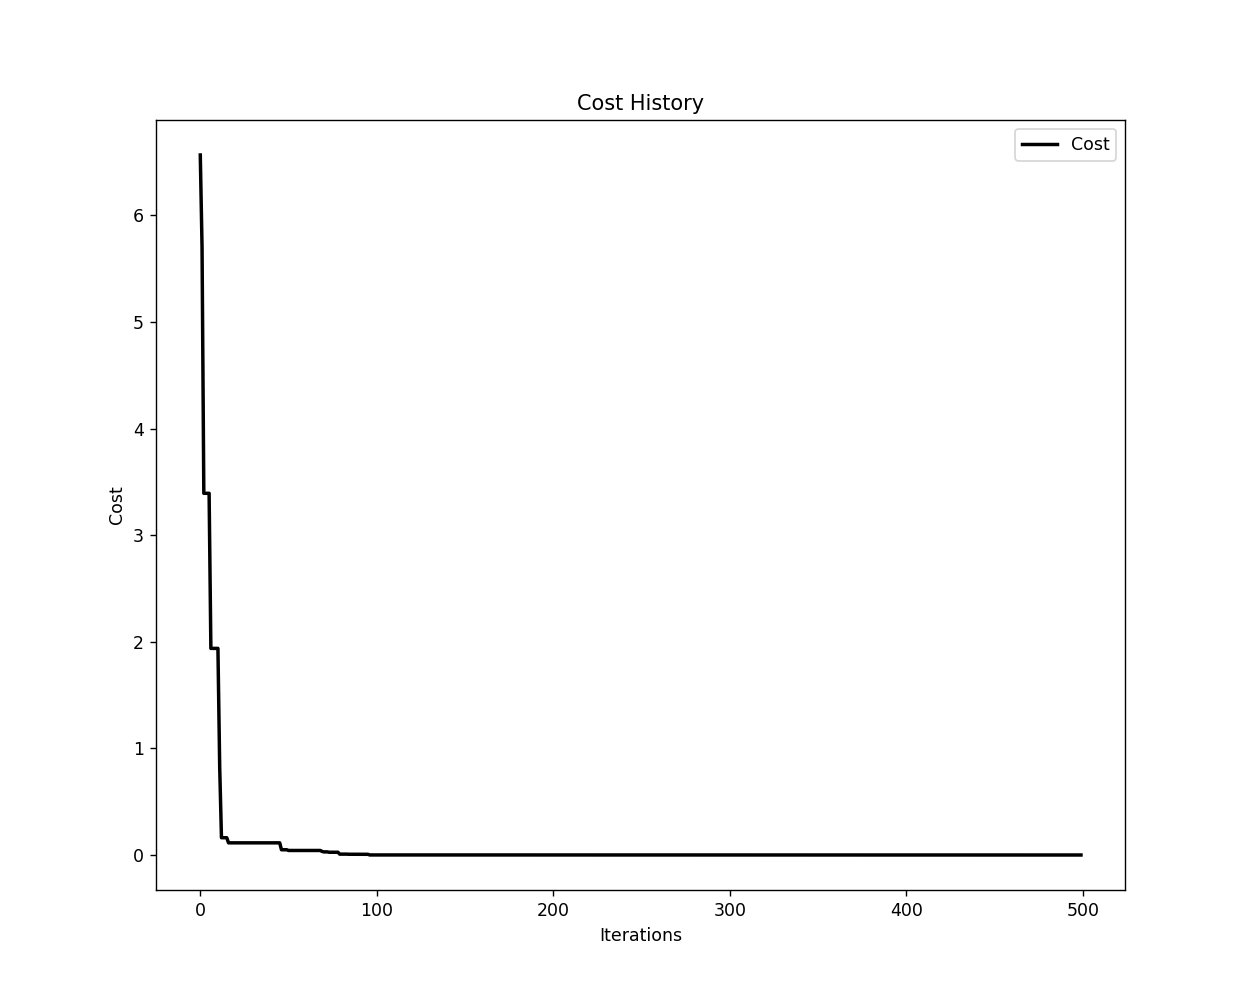

Время выполнения  0.3670206069946289


In [10]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 5.0 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(ackley_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [11]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [-7.87088367e-14  2.62342527e-13]
Наименьшее достигнутое значение функции  7.749356711883593e-13


<IPython.core.display.Javascript object>


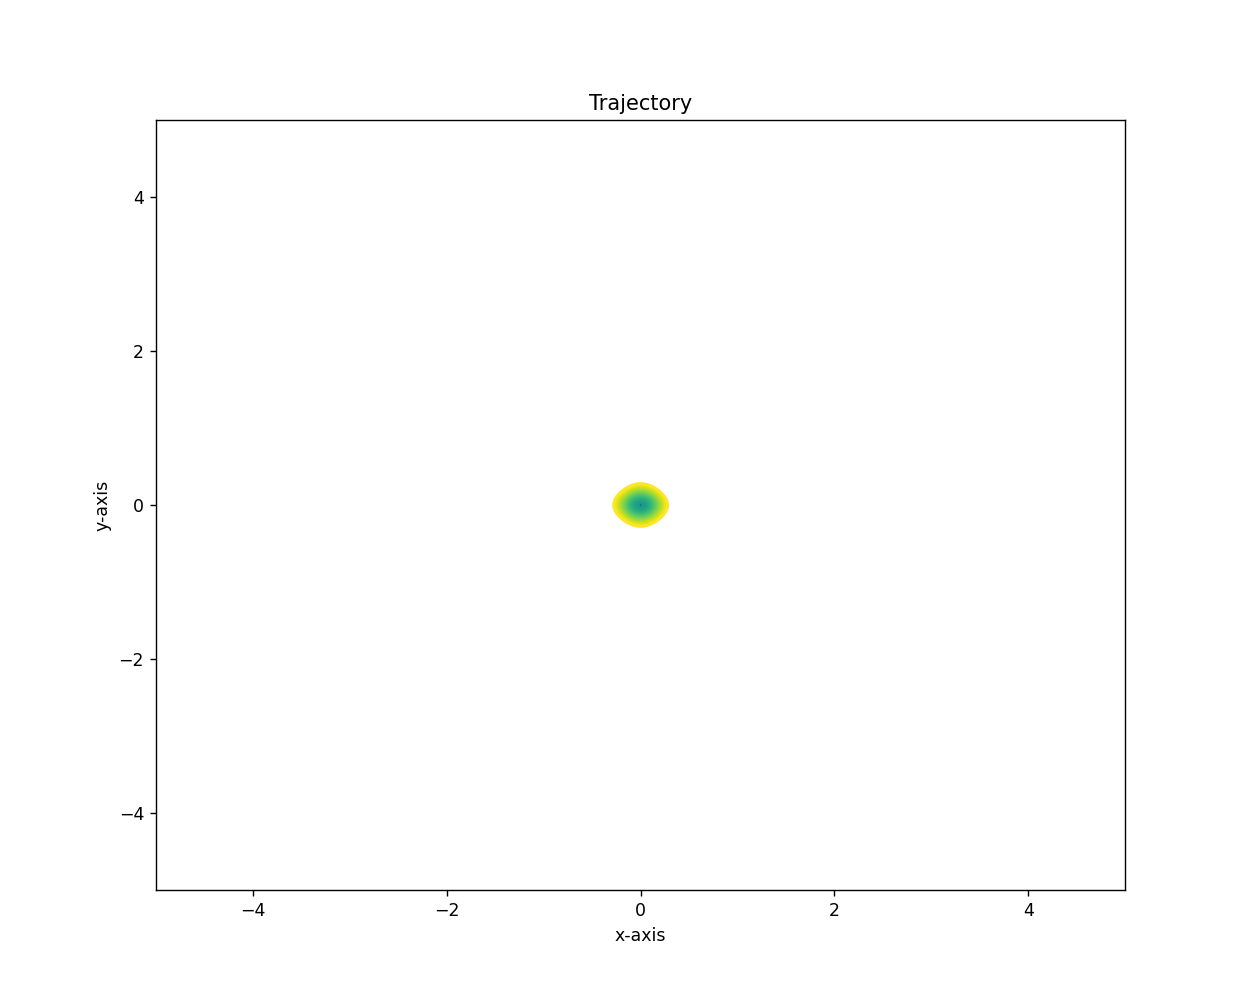

In [12]:
# Initialize mesher with sphere function
m = Mesher(func=ackley_function2)
d = Designer(limits=[(-5,5), (-5,5), (-1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(0,0))

In [13]:
animation.save('Ackley swarm.gif', writer='imagemagick', fps=10)

2021-11-15 01:51:27,094 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-15 01:51:27,095 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Для функции Била

In [14]:
def beale_function2(x):
    x_ = x[:, 0]
    y_ = x[:, 1]
    j = (
        (1.5 - x_ + x_ * y_) ** 2
        + (2.25 - x_ + x_ * y_ ** 2.0) ** 2
        + (2.625 - x_ + x_ * y_ ** 3.0) ** 2
    )
    return j

2021-11-15 01:51:47,456 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|500/500, best_cost=1.54e-12
2021-11-15 01:51:47,766 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.5396215563033884e-12, best pos: [2.99999691 0.49999921]


<IPython.core.display.Javascript object>


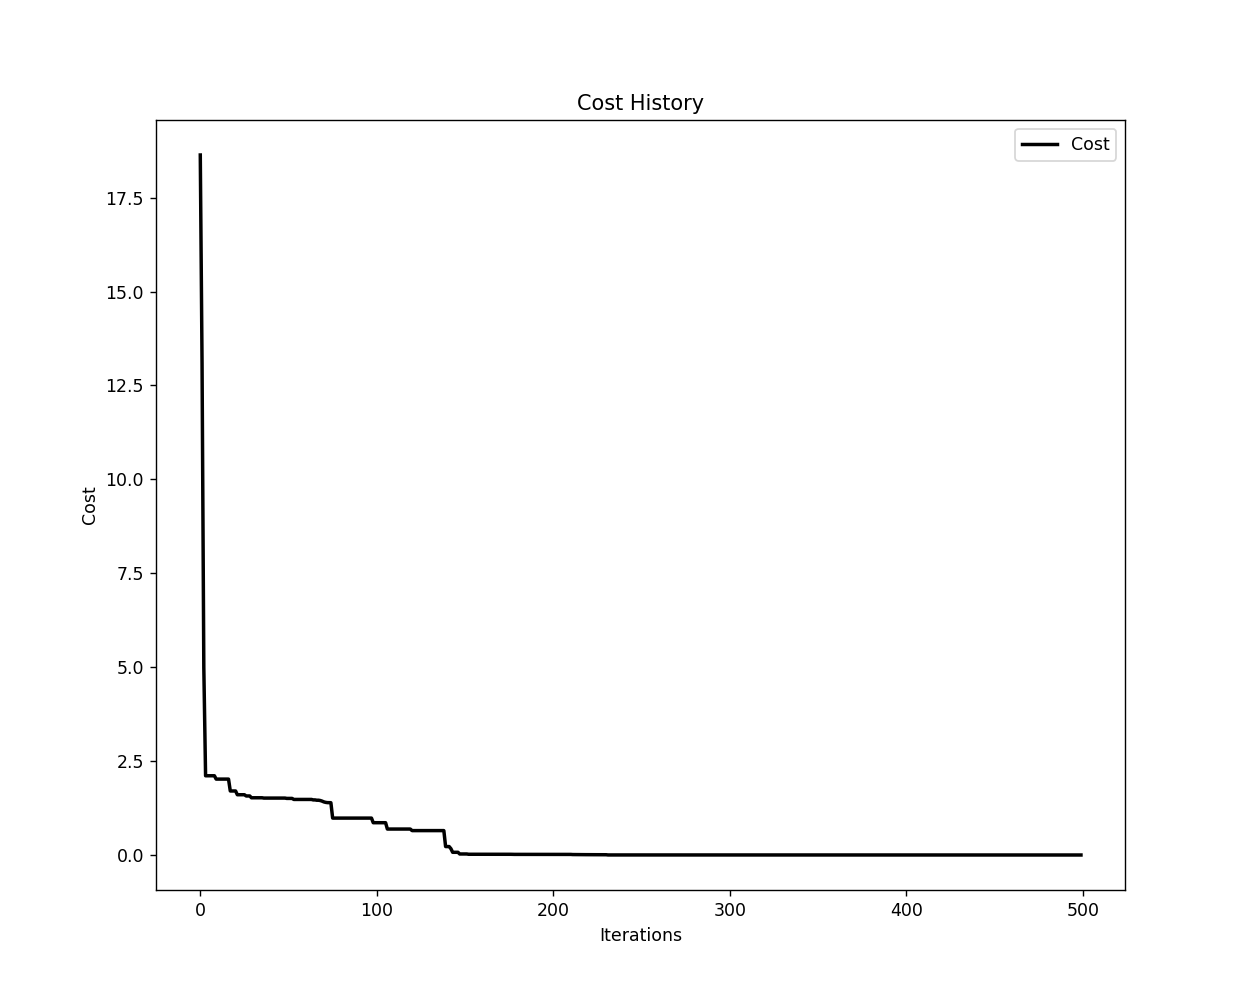

Время выполнения  0.33510446548461914


In [15]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 4.5 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(beale_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [16]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [2.99999691 0.49999921]
Наименьшее достигнутое значение функции  1.5396215563033884e-12


<IPython.core.display.Javascript object>


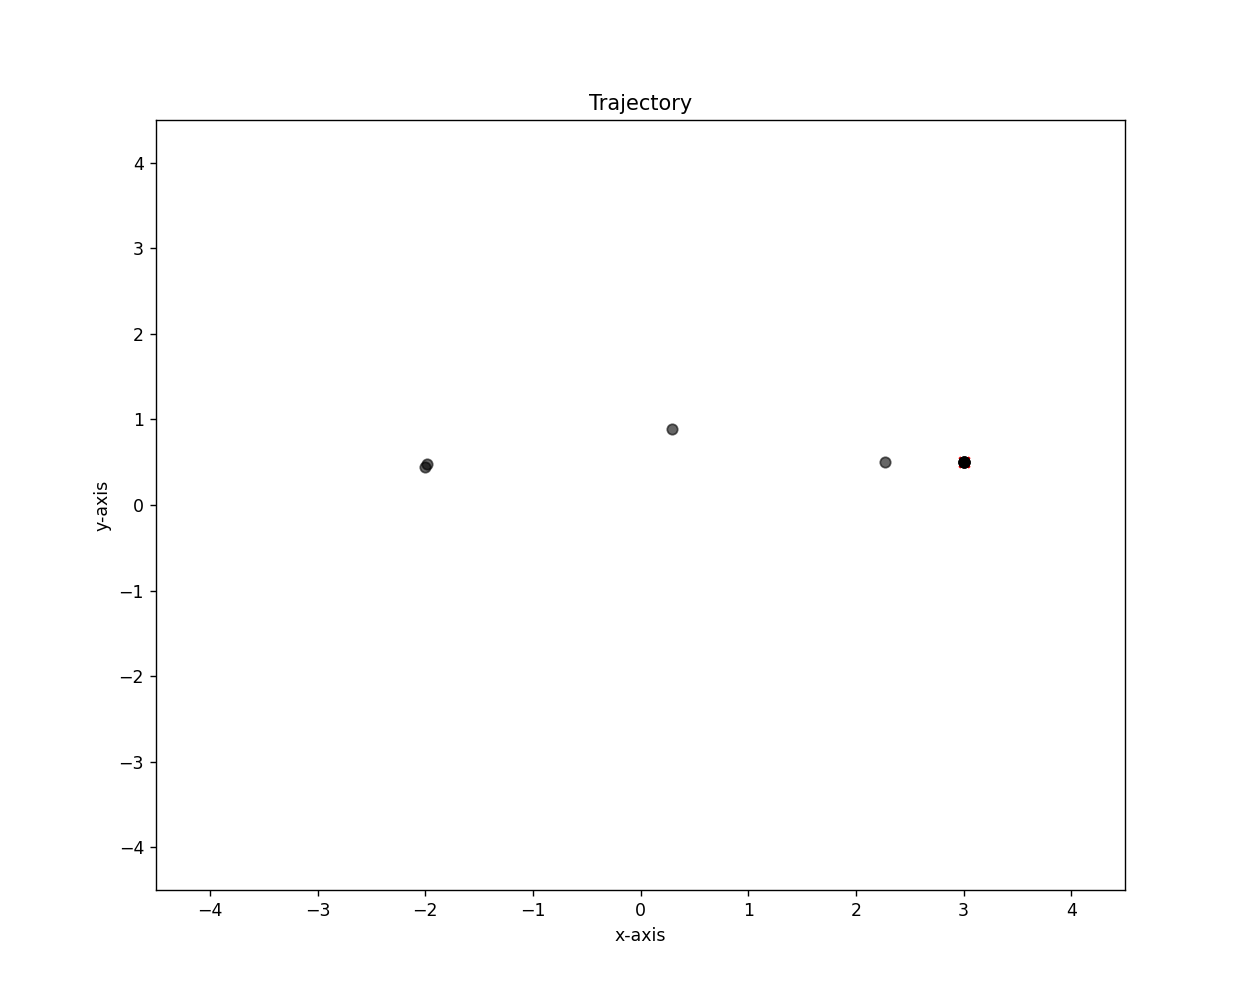

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


In [17]:
# Initialize mesher with sphere function
m = Mesher(func=beale_function2)
d = Designer(limits=[(-4.5,4.5), (-4.5,4.5), (-1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(3,0.5))

In [18]:
animation.save('Bealey swarm.gif', writer='imagemagick', fps=10)

2021-11-15 01:51:48,261 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-15 01:51:48,261 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Для функции Изома

In [19]:
def easom_function2(x):
    x_ = x[:, 0]
    y_ = x[:, 1]
    j = (
        - np.cos(x_) * np.cos(y_)
        * np.exp(- ((x_ - np.pi) ** 2 + (y_ - np.pi) ** 2))
    )
    return j

2021-11-15 01:52:36,829 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|500/500, best_cost=-1
2021-11-15 01:52:37,116 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0, best pos: [3.14159265 3.14159265]


<IPython.core.display.Javascript object>


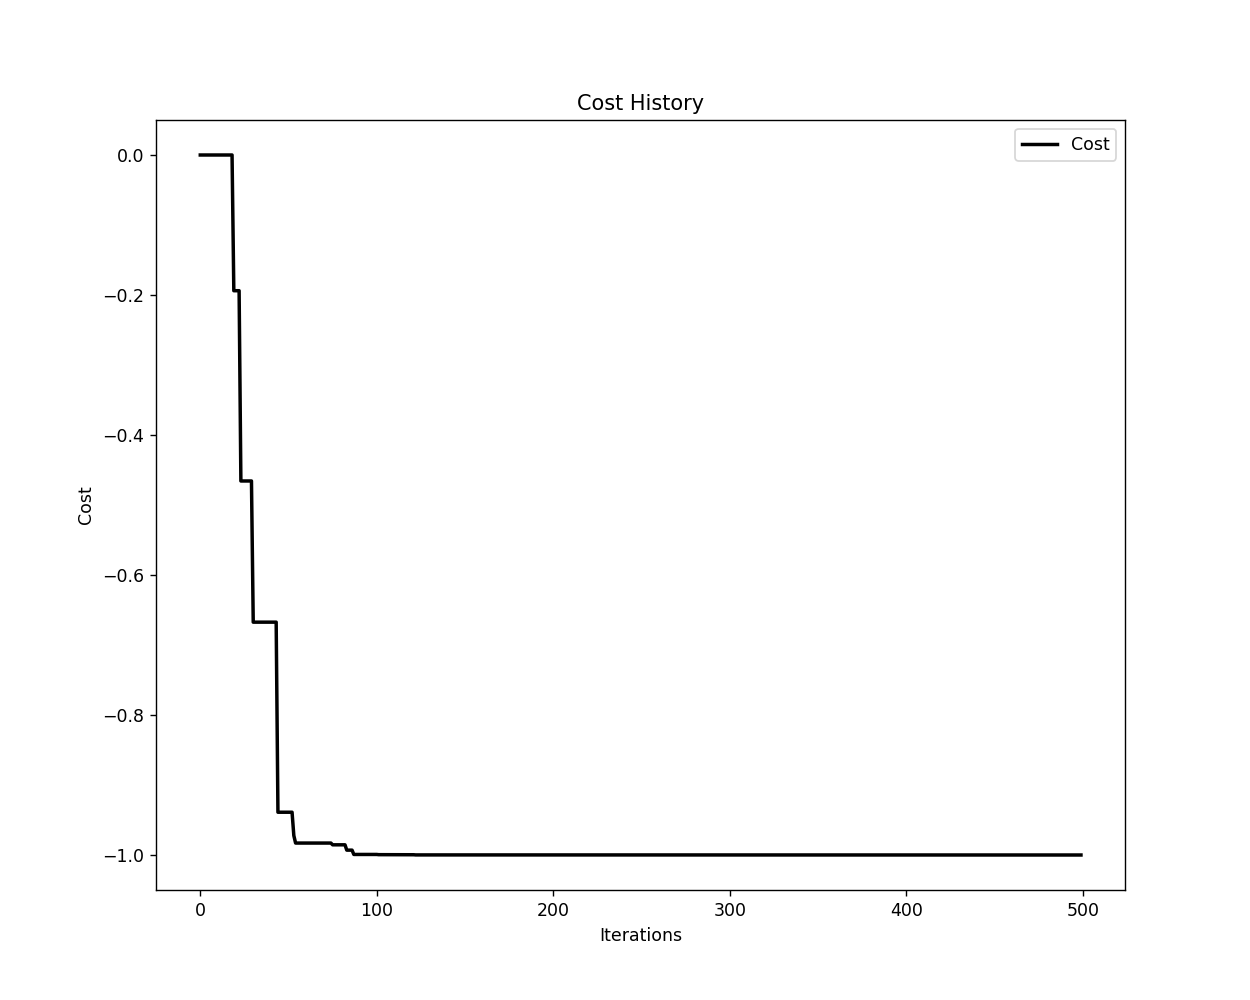

Время выполнения  0.3151383399963379


In [20]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
# Create bounds
max_bound = 100 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

t=time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=varbound)
cost, pos = optimizer.optimize(easom_function2, iters=500)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
t=time.time()-t
print('Время выполнения ', t)

In [21]:
print('Координата лучшего решения ', pos)
print('Наименьшее достигнутое значение функции ', cost)

Координата лучшего решения  [3.14159265 3.14159265]
Наименьшее достигнутое значение функции  -1.0


<IPython.core.display.Javascript object>


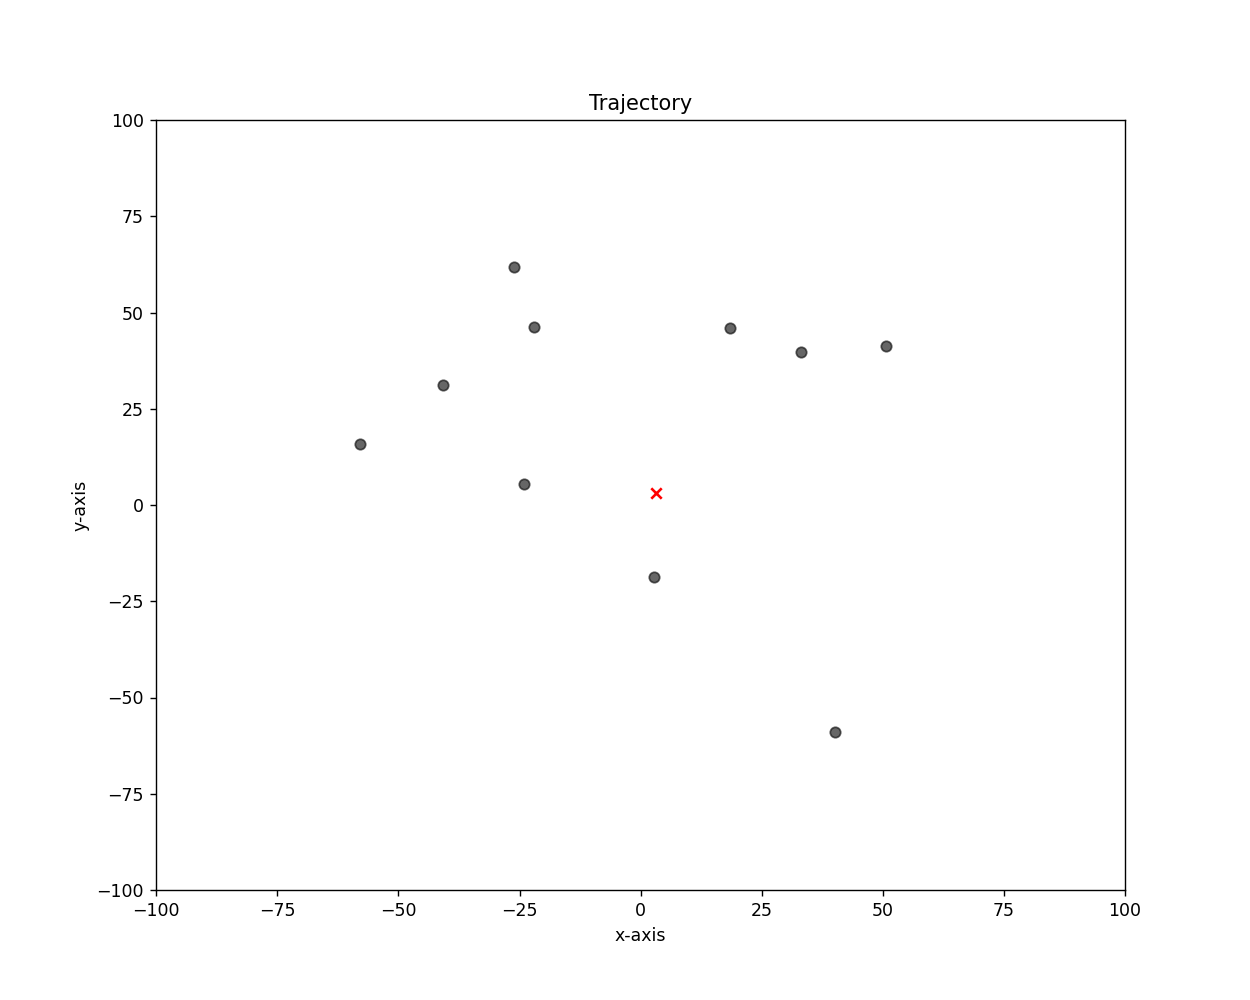

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


In [22]:
# Initialize mesher with sphere function
m = Mesher(func=easom_function2)
d = Designer(limits=[(-100,100), (-100,100), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(np.pi,np.pi))

In [23]:
animation.save('Easom swarm.gif', writer='imagemagick', fps=10)

2021-11-15 01:52:42,638 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2021-11-15 01:52:42,639 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


# Пчелиный алгоритм

#### Библиотека не обновлена в соответствии с изменениями matplotlib, поэтому исходный код немного изменен, это влияет только на визуализацию

Стандартная версия алгоритма пчел включает в себя две эвристики: сокращение района и закрытие участка. 
#### ДАННАЯ РЕАЛИЗАЦИЯ ОСУЩЕСТВЛЯЕТ ПОИСК МАКСИМУМА
Выполняется по шагам:
1. Оценить приспособленность населения в соответствии с целевой функцией;
2. Выберите лучшие nb-участки для поиска по соседству;
3. Набрать пчел-сборщиков NRB для выбранных участков (например, пчел для лучших участков) и оценить их пригодность;
4. Выберите наиболее приспособленную пчелу с каждого локального участка в качестве нового центра участка;
5. Если участок не может быть улучшен с помощью одного локального поиска, размер его окружения уменьшается (сужение соседства);
6. Если участок не может улучшиться в течение циклов stlim, участок покидают (закрытие участка);
7. Поручите оставшимся пчелам равномерно обыскать все пространство поиска и оценить их пригодность;
8. Если критерий остановки не соблюден, вернитесь к шагу 2;

Количество пчел-разведчиков - ns \
Количество участков, выбранных из ns посещенных участков - nb \
Количество элитных участков из nb выбранных участков - ne \
Количество пчел, набранных на лучшие новые участки - nre \
Количество пчел, нанятых для других (nb-ne) выбранных участков (nrb)

In [24]:
from bees_algorithm import BeesAlgorithm, visualize_steps

### Для функции Экли

In [25]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_ackley(X):
    return - ackley_function(X)
search_boundaries=([-5,-5], [5,5])

t=time.time()
alg = BeesAlgorithm(negative_ackley,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.47975778579711914


In [26]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Лучшее значение ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Лучшее значение  0.0
Координаты лучшего решения  [9.133510106021103e-17, -2.633622527415926e-16]


<IPython.core.display.Javascript object>


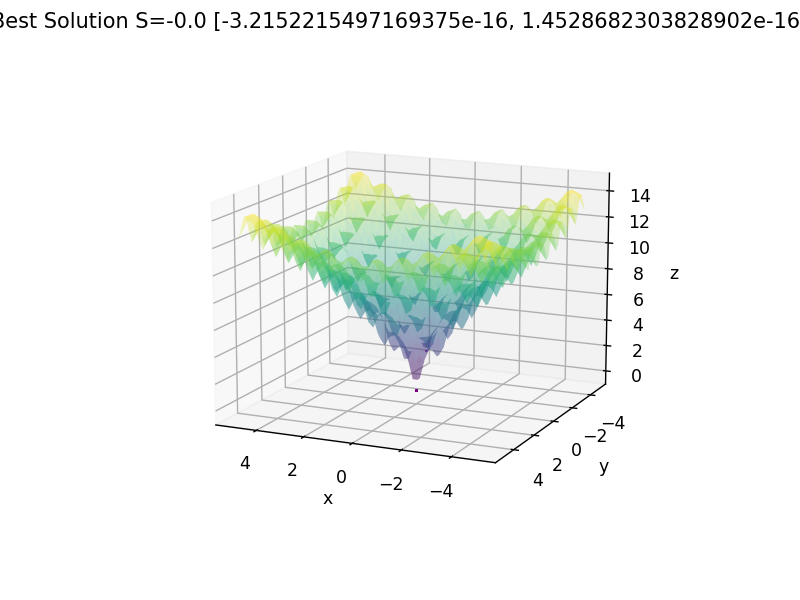

In [27]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_ackley, search_boundaries, ba_parameters )

### Для функции Била

In [28]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_beale(X):
    return - beale_function(X)
search_boundaries=([-4.5,-4.5], [4.5,4.5])

t=time.time()
alg = BeesAlgorithm(negative_beale,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.30623388290405273


In [29]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Лучшее значение ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Лучшее значение  2.7733391199176196e-32
Координаты лучшего решения  [2.9999999999999996, 0.4999999999999999]


<IPython.core.display.Javascript object>


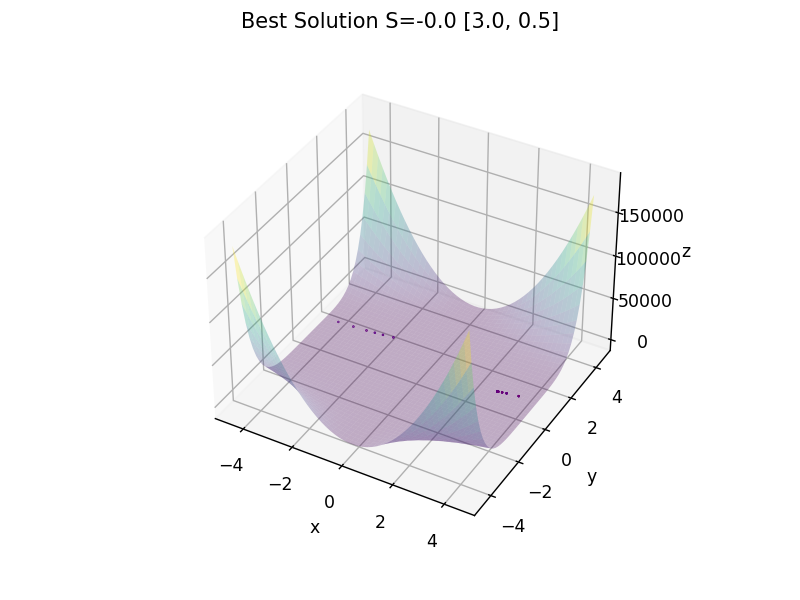

In [30]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_beale, search_boundaries, ba_parameters )

### Для функции Изома

In [31]:
# Пчелиный алгоритм ищет максимум, поэтому нужно взять функцию со знаком -
def negative_easom(X):
    return - easom_function(X)
search_boundaries=([-100.0, -100.0], [100.0, 100.0])

t=time.time()
alg = BeesAlgorithm(negative_easom,
                    search_boundaries[0],
                    search_boundaries[1],
                    ns = 10, nb= 18, ne = 1,
                    nrb = 5, nre = 10, stlim=100
                   )
alg.performFullOptimisation(max_iteration=500)
t=time.time()-t
print('Время выполнения ', t)

Время выполнения  0.32111430168151855


In [32]:
best = alg.best_solution #Получение лучшего решения
# лучшее достигнутое значение функции (точное значение -1.0)
# Значение умножается на -1, так как для поиска минимума мы умножали функцию на -1
print('Лучшее значение ', -best.score)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', best.values)

Лучшее значение  -1.0
Координаты лучшего решения  [3.1415926528678, 3.1415926575115867]


<IPython.core.display.Javascript object>


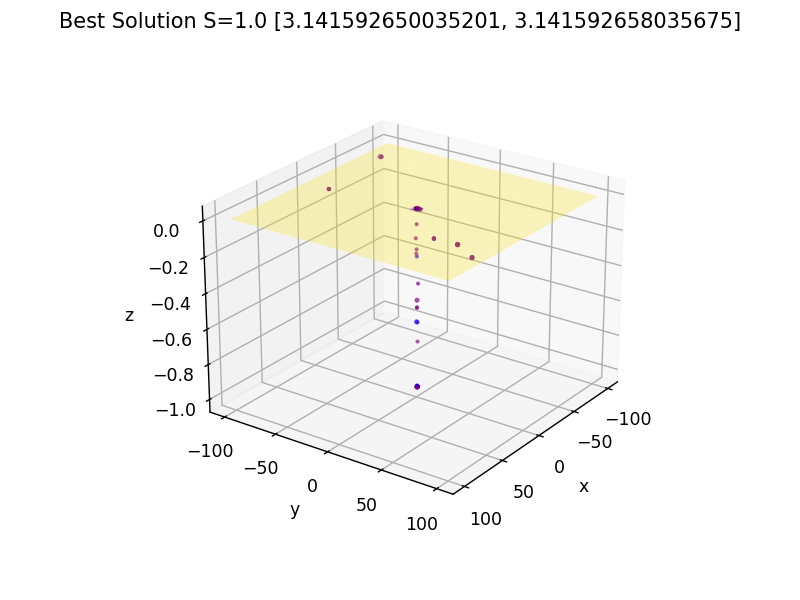

In [33]:
# Визуализация точного решения (код немного изменен)
ba_parameters = {'ns':10,'nb':18,'ne':1,'nrb':5,'nre':10, 'stlim':100}
visualize_steps(negative_easom, search_boundaries, ba_parameters )

# Алгоритм дифференциальной эволюции


In [34]:
from scipy.optimize import differential_evolution

### Для функции Экли

In [49]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(ackley_function(x))

search_boundaries=([-5,5], [-5,5])
t=time.time()
result = differential_evolution(ackley_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= 2.37865
differential_evolution step 2: f(x)= 2.37865
differential_evolution step 3: f(x)= 2.37865
differential_evolution step 4: f(x)= 0.0477741
differential_evolution step 5: f(x)= 0.0477741
differential_evolution step 6: f(x)= 0.0477741
differential_evolution step 7: f(x)= 0.0477741
differential_evolution step 8: f(x)= 0.0477741
differential_evolution step 9: f(x)= 0.0477741
differential_evolution step 10: f(x)= 0.0269299
differential_evolution step 11: f(x)= 0.0101004
differential_evolution step 12: f(x)= 0.0101004
differential_evolution step 13: f(x)= 0.00641999
differential_evolution step 14: f(x)= 0.00641999
differential_evolution step 15: f(x)= 0.00267751
differential_evolution step 16: f(x)= 0.000522526
differential_evolution step 17: f(x)= 0.000109546
differential_evolution step 18: f(x)= 0.000109546
differential_evolution step 19: f(x)= 0.000109546
differential_evolution step 20: f(x)= 0.000109546
differential_evolution step 21: f(x)= 0.00

In [50]:
# лучшее достигнутое значение функции (точное значение 0)
print('Лучшее значение ', result.fun)
# Координаты лучшего решения (точное значение (0, 0))
print('Координаты лучшего решения ', result.x)

Лучшее значение  0.0
Координаты лучшего решения  [0. 0.]


<IPython.core.display.Javascript object>


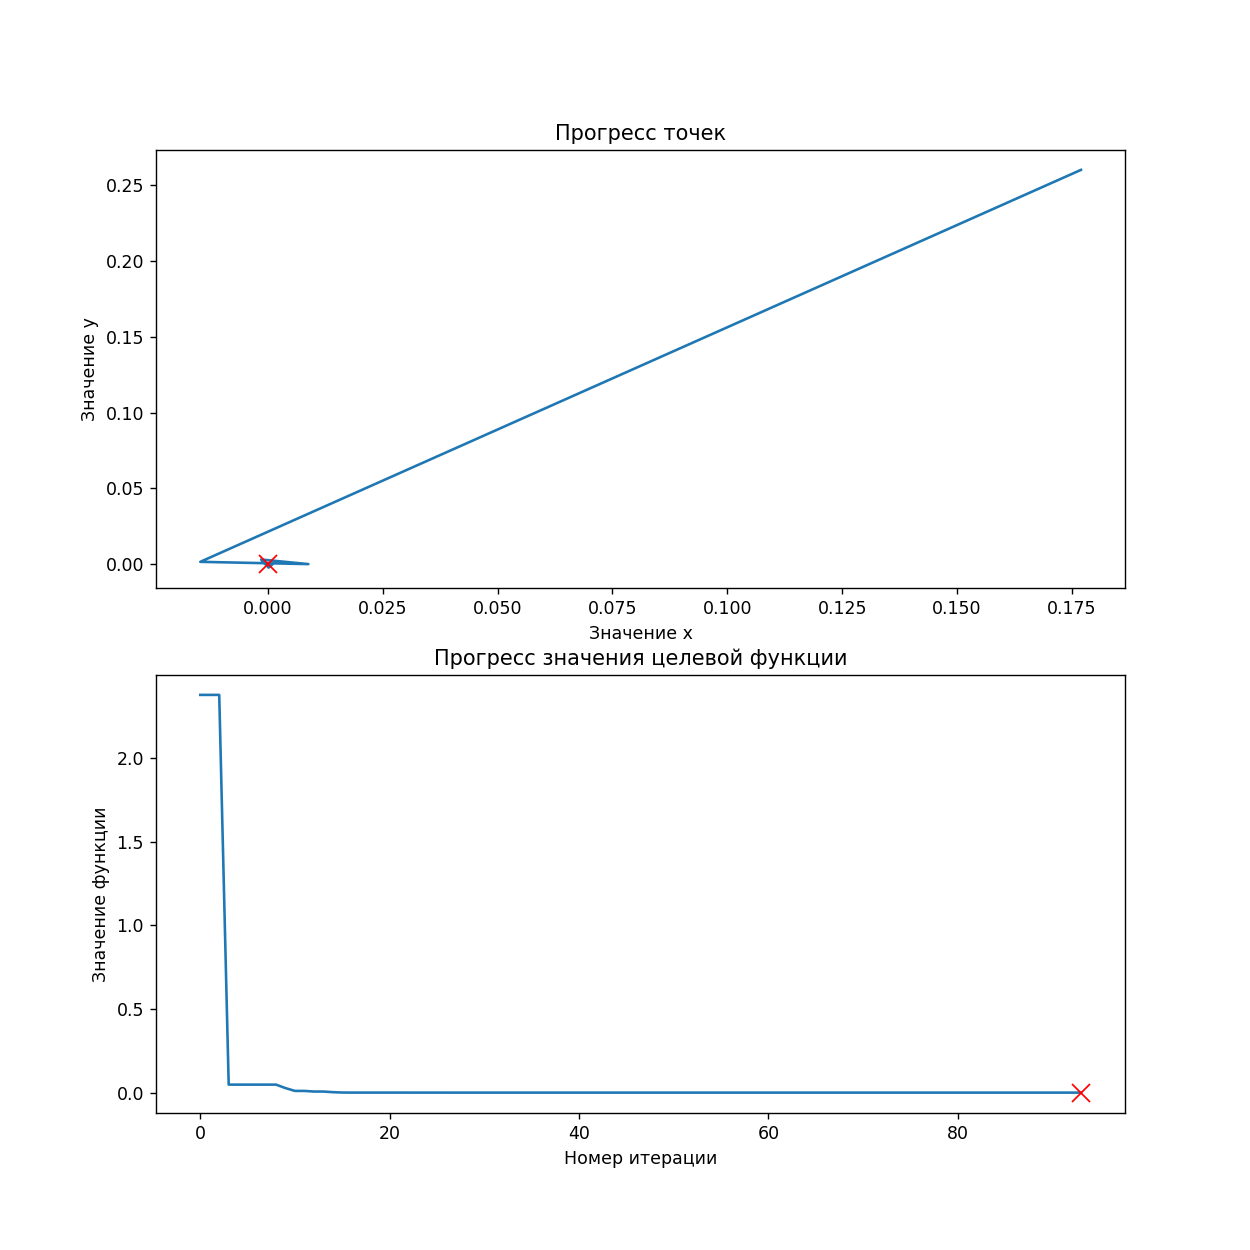

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### Для функции Била

In [52]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(beale_function(x))

search_boundaries=([-4.5,4.5], [-4.5,4.5])
t=time.time()
result = differential_evolution(beale_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= 0.626086
differential_evolution step 2: f(x)= 0.432007
differential_evolution step 3: f(x)= 0.270854
differential_evolution step 4: f(x)= 0.00489498
differential_evolution step 5: f(x)= 0.00489498
differential_evolution step 6: f(x)= 0.00489498
differential_evolution step 7: f(x)= 0.00489498
differential_evolution step 8: f(x)= 0.00140104
differential_evolution step 9: f(x)= 0.000997927
differential_evolution step 10: f(x)= 0.000829739
differential_evolution step 11: f(x)= 0.000829739
differential_evolution step 12: f(x)= 0.000157918
differential_evolution step 13: f(x)= 0.000135865
differential_evolution step 14: f(x)= 0.000135865
differential_evolution step 15: f(x)= 2.46766e-05
differential_evolution step 16: f(x)= 7.44951e-07
differential_evolution step 17: f(x)= 7.44951e-07
differential_evolution step 18: f(x)= 7.44951e-07
differential_evolution step 19: f(x)= 7.44951e-07
differential_evolution step 20: f(x)= 7.44951e-07
differential_evolution 

In [53]:
# лучшее достигнутое значение функции (точное значение 0)
print('Лучшее значение ', result.fun)
# Координаты лучшего решения (точное значение (3, 0.5))
print('Координаты лучшего решения ', result.x)

Лучшее значение  3.2047474274603605e-31
Координаты лучшего решения  [3.  0.5]


<IPython.core.display.Javascript object>


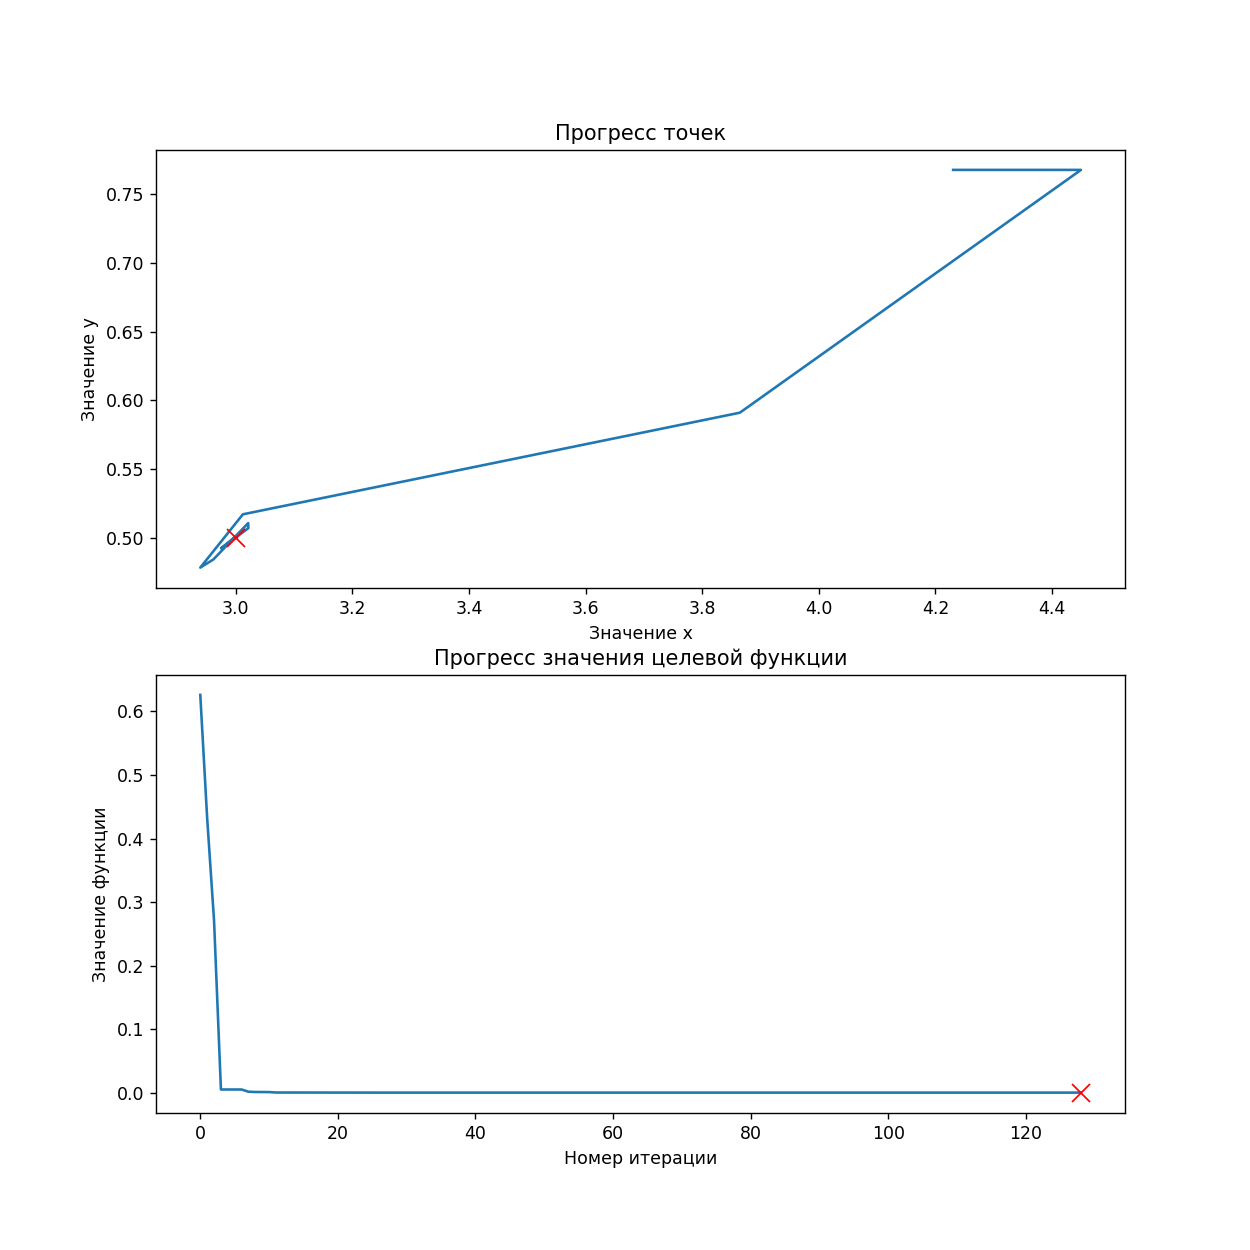

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### Для функции Изома

In [45]:
progress = []
progress_val = []

def cb(x, convergence):
    progress.append(x)
    progress_val.append(easom_function(x))

search_boundaries=([-100,100], [-100,100])
t=time.time()
result = differential_evolution(easom_function, search_boundaries, disp=True, callback=cb)

progress = np.array(progress)
progress_val = np.array(progress_val)
t=time.time()-t
print('Время выполнения ', t)

differential_evolution step 1: f(x)= -1.25254e-34
differential_evolution step 2: f(x)= -1.25254e-34
differential_evolution step 3: f(x)= -1.25254e-34
differential_evolution step 4: f(x)= -1.25254e-34
differential_evolution step 5: f(x)= -1.25254e-34
differential_evolution step 6: f(x)= -1.25254e-34
differential_evolution step 7: f(x)= -1.25254e-34
differential_evolution step 8: f(x)= -1.25254e-34
differential_evolution step 9: f(x)= -6.71209e-05
differential_evolution step 10: f(x)= -6.71209e-05
differential_evolution step 11: f(x)= -6.71209e-05
differential_evolution step 12: f(x)= -6.71209e-05
differential_evolution step 13: f(x)= -6.71209e-05
differential_evolution step 14: f(x)= -6.71209e-05
differential_evolution step 15: f(x)= -6.71209e-05
differential_evolution step 16: f(x)= -0.0460282
differential_evolution step 17: f(x)= -0.0460282
differential_evolution step 18: f(x)= -0.0460282
differential_evolution step 19: f(x)= -0.0460282
differential_evolution step 20: f(x)= -0.160654


In [46]:
# лучшее достигнутое значение функции (точное значение -1.0)
print('Лучшее значение ', result.fun)
# Координаты лучшего решения (точное значение (pi, pi))
print('Координаты лучшего решения ', result.x)

Лучшее значение  -1.0
Координаты лучшего решения  [3.14159265 3.14159265]


<IPython.core.display.Javascript object>


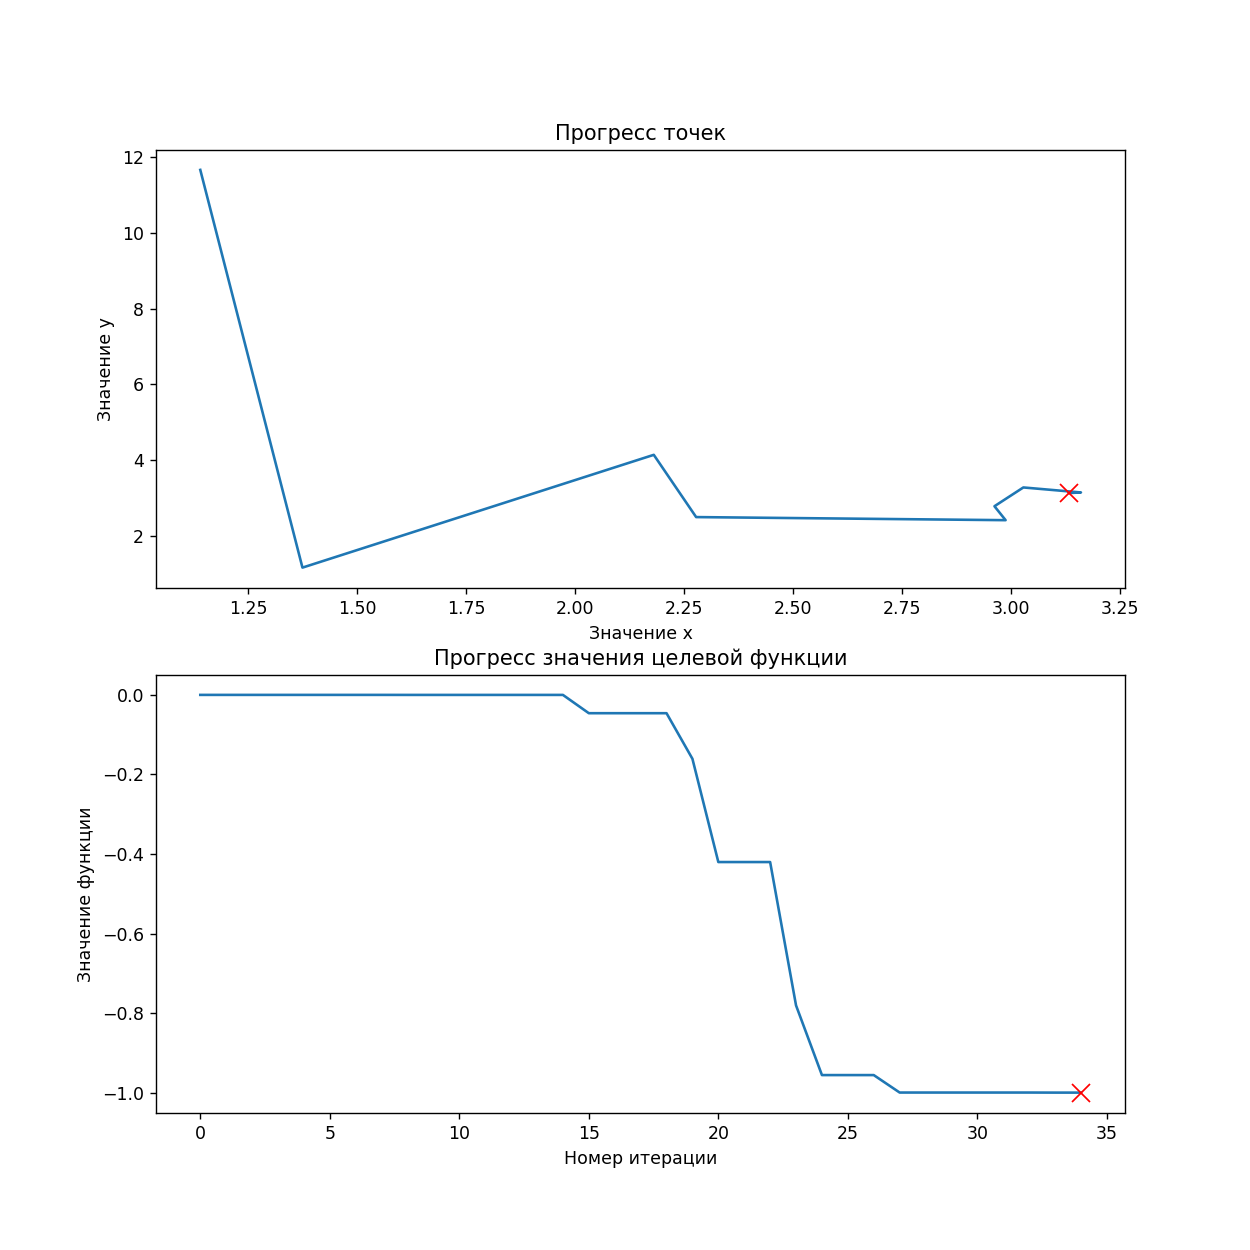

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.title.set_text('Прогресс точек')
ax.set_xlabel('Значение x')
ax.set_ylabel('Значение y')
ax.plot(progress[:, 0], progress[:, 1])
ax.plot(progress[-1, 0], progress[-1, 1], 'rx', markersize=10)
ax = fig.add_subplot(2,1,2)
ax.title.set_text('Прогресс значения целевой функции')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение функции')
ax.plot(progress_val)
ax.plot(len(progress_val)-1,progress_val[-1],'rx', markersize=10)
plt.show()

### Примечания
В папке с проектом лежат гиф файлы с анимацией того, как рой частиц обучался и постепенно достигал оптимального решения.

3д проекция для пчелиного алгоритма отображает промежуточные минимумы, которые были обнаружены алгоритмом. Исходный код пришлось немного отредактировать, так как он не совместим с текущей версией matplotlib.

Графики прогресса точек и значений отображают траекторию того как с каждой итерацией менялось решение. Красный крест обозначает финальное решение, оптимальную точку, которая была найдена алгоритмом.